<a href="https://colab.research.google.com/github/jumbokh/csu1101-ML-Class/blob/main/notebooks/3_4_%E7%94%B5%E5%BD%B1%E8%AF%84%E8%AE%BA%E5%88%86%E7%B1%BB%EF%BC%9A%E4%BA%8C%E5%88%86%E7%B1%BB%E9%97%AE%E9%A2%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1 准备数据
IMDB数据集，内置于Keras库中，它包含来自互联网电影数据库（IMDB）的 50 000 条严重两极分
化的评论。数据集被分为用于训练的 25 000 条评论与用于测试的 25 000 条评论，训练集和测试
集都包含 50% 的正面评论和 50% 的负面评论

In [14]:
# 1 准备数据

# 防止报错 OMP: Error #15: Initializing libiomp5.dylib, but found libiomp5.dylib already initialized.
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

# 加载数据
from keras.datasets import imdb
#限定为前10000个最长见的单词
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# 将整数序列编码为二进制矩阵 ,one-hot编码
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data) 

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# 留出10000个样本作为验证集
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
# 由于num_words = 10000， 所以最大值为9999
max([max(sequence) for sequence in train_data])

9999

In [16]:
# 将某条评论迅速解码为英文单词

word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value,key) for (key,value)  in word_index.items()])
decoded_review = ' '.join(
 [reverse_word_index.get(i - 3, '?') for i in train_data[0]]) 

In [17]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## 2 构建网络

In [18]:
# 2 定义模型
from keras import models
from keras import layers
#model = models.Sequential()
#model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
#model.add(layers.Dense(16, activation='relu'))
#model.add(layers.Dense(1, activation='sigmoid'))

In [31]:
import keras
print(keras.__version__)

2.6.0


In [33]:
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=keras.regularizers.l1(0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, kernel_regularizer=keras.regularizers.l1(0.001), activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

## 3 配置优化器、损失函数和指标

In [34]:
# 3 配置优化器、损失函数和指标
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# # 也可以自定义优化器、损失和指标
# from keras import optimizers
# from keras import losses
# from keras import metrics
# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#               loss=losses.binary_crossentropy,
#               metrics=[metrics.binary_accuracy])

## 4 训练模型

In [35]:
#训练模型
history = model.fit(partial_x_train,
              partial_y_train,
              epochs=20,
              batch_size=512,
              validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 45ms/step - loss: 1.1488 - accuracy: 0.6149 - val_loss: 0.8048 - val_accuracy: 0.7686
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.7786 - accuracy: 0.7152 - val_loss: 0.7213 - val_accuracy: 0.8275
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.7374 - accuracy: 0.7563 - val_loss: 0.6743 - val_accuracy: 0.8456
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.7046 - accuracy: 0.7794 - val_loss: 0.6465 - val_accuracy: 0.8479
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.6828 - accuracy: 0.7967 - val_loss: 0.6090 - val_accuracy: 0.8514
Epoch 6/20
30/30 [==============================] - 1s 35ms/step - loss: 0.6667 - accuracy: 0.8069 - val_loss: 0.5884 - val_accuracy: 0.8571
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.6623 - accuracy: 0.8133 - val_loss: 0.5920 - val_accuracy: 0.8594
Epoch 8/20
30

## 5 模型评估

In [36]:
history_dict = history.history

In [37]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

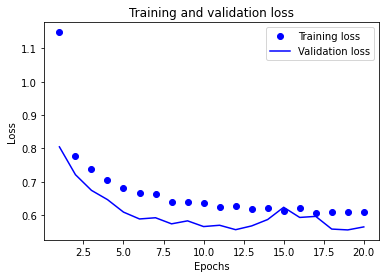

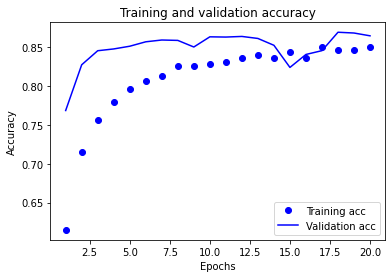

In [38]:
#绘制训练损失和验证损失
import matplotlib.pyplot as plt
%matplotlib inline 
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 绘制训练精度和验证精度
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

 从上图可以看出，从第4轮开始达到最佳值，之后出现过拟合现象。
 
 为了防止过拟合，可以在 3 轮之后停止训练
 从头开始训练一个新的网络，训练 4 轮，然后在测试数据上评估模型

In [39]:
# 从新调整模型

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)

results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 27ms/step - loss: 0.4701 - accuracy: 0.8205
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2707 - accuracy: 0.9067
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2079 - accuracy: 0.9268
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3050 - accuracy: 0.8781


In [40]:
results

[0.3049628436565399, 0.8781200051307678]

## 6 预测结果

In [41]:
 model.predict(x_test)

array([[0.29708758],
       [0.9999445 ],
       [0.9602641 ],
       ...,
       [0.20800442],
       [0.13671264],
       [0.7371617 ]], dtype=float32)

## 7　进一步的实验
通过以下实验，你可以确信前面选择的网络架构是非常合理的，虽然仍有改进的空间。
- 前面使用了两个隐藏层。你可以尝试使用一个或三个隐藏层，然后观察对验证精度和测试精度的影响。
- 尝试使用更多或更少的隐藏单元，比如 32 个、64 个等。
- 尝试使用 mse 损失函数代替 binary_crossentropy。
- 尝试使用 tanh 激活（这种激活在神经网络早期非常流行）代替 relu。